In [2]:
%cd C:/Users/USER/Desktop/Project/Electric

C:\Users\USER\Desktop\Project\Electric


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [4]:
train = pd.read_csv('./Data/train.csv', encoding = 'cp949')
test = pd.read_csv('./Data/test.csv', encoding = 'cp949')
sub = pd.read_csv('./Data/sample_submission.csv')

In [5]:
train.columns = ['num','datetime','target','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']
test.columns = ['num','datetime','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']

In [6]:
train

,num,datetime,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [9]:
train['datetime']

0         2020-06-01 00
1         2020-06-01 01
2         2020-06-01 02
3         2020-06-01 03
4         2020-06-01 04
              ...      
122395    2020-08-24 19
122396    2020-08-24 20
122397    2020-08-24 21
122398    2020-08-24 22
122399    2020-08-24 23
Name: datetime, Length: 122400, dtype: object

In [10]:
def date_preprocessing(data):
    # datetime 타입으로 변경
    data['datetime'] = pd.to_datetime(data['datetime']) 
    #시간 나누기
    data['hour'] = data['datetime'].dt.hour
    #요일 나누기 
    data['weekday'] = data['datetime'].dt.weekday + 1
    #일 나누기
    data['day'] = data['datetime'].dt.day
    
    return data

In [11]:


date_preprocessing(train)

,num,datetime,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,hour,weekday,day
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,1,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,1,1
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,1,1
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,1,24
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,1,24
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,1,24
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,1,24


In [12]:
train['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [44]:
train_2 = train.loc[train['num'] == 2, 'target'].reset_index(drop = True)

In [45]:
train_2

0        977.184
1        966.168
2        972.972
3        965.844
4        971.676
          ...   
2035    1353.348
2036    1260.036
2037    1214.028
2038    1126.224
2039    1107.432
Name: target, Length: 2040, dtype: float64

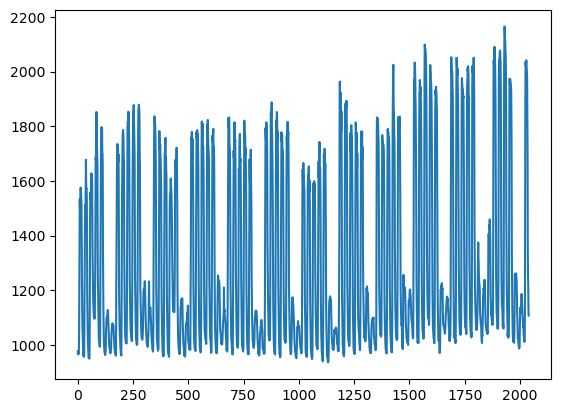

In [46]:
train_2.plot()
plt.show()

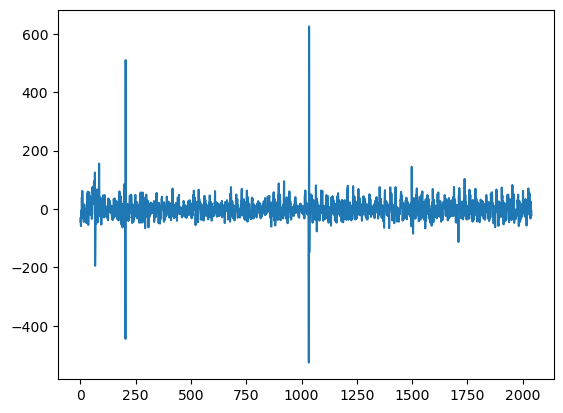

In [47]:
diff_1 = train_1.diff().dropna()
plt.plot(diff_1)
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data) :
    result = adfuller(data.values)
    print(f'ADF Statistics : {result[0]}')
    print(f'p-values : {result[1]}')

In [49]:
adf_test(diff_2) # 시계열이 안정적이지 않음

NameError: name 'diff_2' is not defined

In [50]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


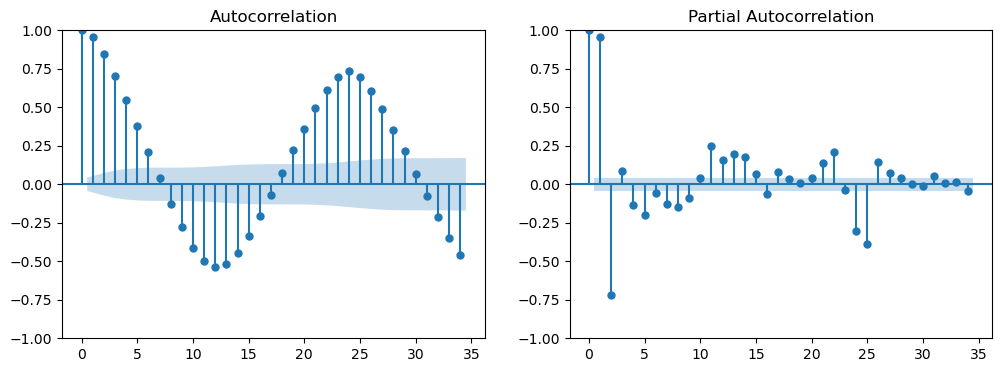

In [51]:
# 시각화
fig, ax = plt.subplots(1,2 , figsize = (12,4))

# acf plot
plot_acf(train_2, ax = ax[0]) # ACF는 점진적 감소 : p = 1

# pacf plot
plot_pacf(train_2, ax= ax[1]) # PACF는 자기자신을 제외한 첫번째 절단면 이후 절단면을 보임 : q = 0
plt.show()

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_2, order = (1,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                 2040
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -12306.739
Date:                Fri, 20 Oct 2023   AIC                          24619.478
Time:                        08:12:23   BIC                          24636.340
Sample:                             0   HQIC                         24625.663
                               - 2040                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1299.9142     63.593     20.441      0.000    1175.273    1424.555
ar.L1          0.9539      0.010     93.287      0.000       0.934       0.974
sigma2      1.016e+04    220.646     46.056      0.000    9729.537    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                 959.77   Jarque-Bera (JB):              2387.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
train_2.plot

SyntaxError: invalid syntax (3204706998.py, line 1)

<Axes: >

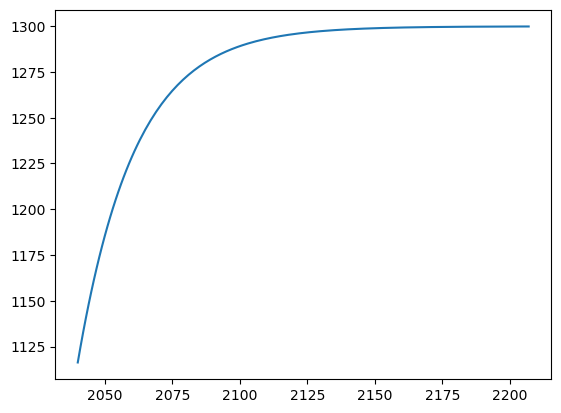

In [57]:
model_fit.forecast(168).plot()